<a href="https://colab.research.google.com/github/kunalavghade/Ai/blob/main/Basic_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks**

Let’s say you want to predict some output value y, given some input value X. For example, maybe you want to predict your score on a test based on how many hours you sleep and how many hours you study the night before. To use a machine learning approach, we first need some data. Let’s say for the last three tests, you recorded your number of hours of studying, your number of hours sleeping, and your score on the test. We'll use the programming language python to store our data in 2-dimensional numpy arrays.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[3,5], [5,1], [10, 2]], dtype=float)
Y = np.array([[75], [82], [93]], dtype=float)

In [4]:
X = X/np.amax(X, axis=0)
Y = Y/100 #Max test score is 100

In [5]:
X

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [6]:
Y

array([[0.75],
       [0.82],
       [0.93]])

In [7]:
X.shape, Y.shape

((3, 2), (3, 1))

In [8]:
X = X / np.amax(X, axis=0)
Y = Y / 100 # Assuming max score is 100
Y = Y.reshape(-1, 1)

### Neural Network Theory

A **Neural Network** is a computational model inspired by the human brain, designed to recognize patterns and make predictions. It consists of interconnected layers of 'neurons' (nodes) that process information.

In [9]:
class NeuralNetwork:
  def __init__(self):
    self.inputLayerSize = 2
    self.outputLayerSize = 1
    self.hiddenLayerSize = 3

  def forward(self, X):
    pass


In [10]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

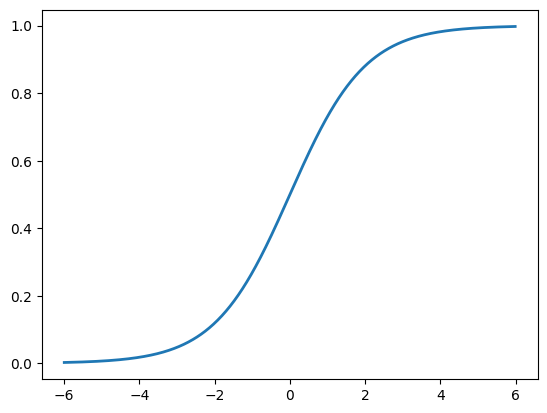

In [11]:
testInput = np.arange(-6, 6, 0.01)
plt.plot(testInput, sigmoid(testInput), linewidth= 2)
plt.show()

*   **Input Layer**: Receives the initial data (features), e.g., hours slept, hours studied.

*   **Hidden Layer(s)**: Intermediate layers that perform computations on the input to extract more complex features and patterns. The number of neurons in these layers (`hiddenLayerSize`) is a **hyperparameter** you define.

*   **Output Layer**: Produces the network's final prediction, e.g., test score.

*   **Weights (W)**: These are numerical parameters that determine the strength of the connection between neurons. During training, the network adjusts these weights to learn from the data. They are essentially what the neural network learns.

*   **Forward Propagation**: This is the process where input data `X` travels through the network, from the input layer, through hidden layers, to the output layer. At each connection, the input is multiplied by a weight and sums up to form a weighted input (`z`).

*   **Activation Function (Sigmoid)**: Applied to the weighted sum (`z`) at each neuron (or layer output). Its purpose is to introduce **non-linearity** into the network, allowing it to learn complex, non-linear relationships in the data. The sigmoid function squashes any input value into a range between 0 and 1, making it useful for probability-like outputs or binary classification. Without activation functions, a neural network would only be able to learn linear relationships, no matter how many layers it had.

In [12]:
class Neural_Network(object):
    def __init__(self):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

In [13]:
NN = Neural_Network()

In [14]:
yHat = NN.forward(X)

In [15]:
yHat, Y

(array([[0.70253474],
        [0.6623545 ],
        [0.64484381]]),
 array([[0.0075],
        [0.0082],
        [0.0093]]))

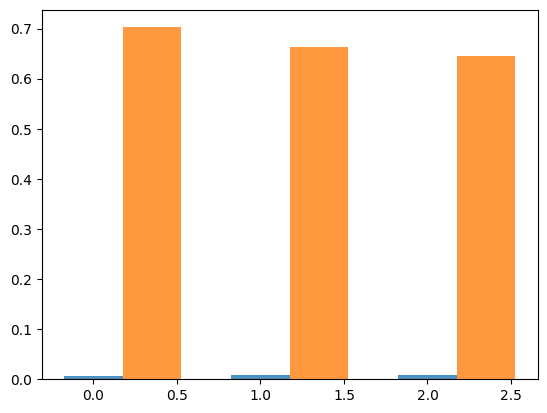

In [16]:
plt.bar([0, 1, 2], Y.flatten(), width = 0.35, alpha= 0.8)
plt.bar([0.35, 1.35, 2.35], yHat.flatten(), width = 0.35, alpha= 0.8)
plt.show(['y', 'yHat'])

## 1. Architecture Overview
The network consists of an **input layer**, one **hidden layer**, and an **output layer**.

* **Input Layer ($X$):** The raw features.
* **Hidden Layer ($a^{(2)}$):** Processes features via weights $W^{(1)}$ and a non-linear activation function.
* **Output Layer ($\hat{y}$):** Produces the final prediction via weights $W^{(2)}$.



---

## 2. Forward Propagation
Forward propagation is the process of calculating the output by moving data through the layers.

### Step 1: Hidden Layer
First, we calculate the weighted sum of inputs ($z^{(2)}$) and apply the activation function ($f$):
$$z^{(2)} = X W^{(1)}$$
$$a^{(2)} = f(z^{(2)})$$

### Step 2: Output Layer
The hidden layer activity acts as input for the final layer:
$$z^{(3)} = a^{(2)} W^{(2)}$$
$$\hat{y} = f(z^{(3)})$$

---

## 3. Activation Function: Sigmoid
To introduce non-linearity, we use the **Sigmoid** function, which maps any value to a range between 0 and 1.
$$f(z) = \frac{1}{1 + e^{-z}}$$

For backpropagation, we need the derivative of this function:
$$f'(z) = \frac{e^{-z}}{(1 + e^{-z})^2}$$

---

## 4. Error Function (Cost Function)
We measure the network's performance using the **Sum of Squares Error**:
$$J = \sum \frac{1}{2}(y - \hat{y})^2$$
Our goal is to find weight matrices $W$ that minimize $J$.

---

## 5. Backpropagation Derivation
Backpropagation uses the **Chain Rule** to calculate how the error changes with respect to each weight.



### Output Layer Gradient ($\frac{\partial J}{\partial W^{(2)}}$)
We define the error term for the output layer ($\delta^{(3)}$) as the product of the error and the derivative of the activation:
$$\delta^{(3)} = -(y - \hat{y}) \odot f'(z^{(3)})$$
The gradient for the second weight matrix is:
$$\frac{\partial J}{\partial W^{(2)}} = (a^{(2)})^T \delta^{(3)}$$

### Hidden Layer Gradient ($\frac{\partial J}{\partial W^{(1)}}$)
We "backpropagate" the error from the output layer through $W^{(2)}$ to find the error at the hidden layer ($\delta^{(2)}$):
$$\delta^{(2)} = (\delta^{(3)}(W^{(2)})^T) \odot f'(z^{(2)})$$
The gradient for the first weight matrix is:
$$\frac{\partial J}{\partial W^{(1)}} = X^T \delta^{(2)}$$

---


In [17]:
class Neural_Network(object):
    def __init__(self):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J

    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)

        return dJdW1, dJdW2

In [18]:
NN = Neural_Network()

**Calculation of Error cost without optimized way not recommneded**

In [19]:
cost1 = NN.costFunction(X, Y)

**Calculation of Error cost via partial derivation / backpropagation using gradient descend**

### The Mathematics of the Step

The update rule for any weight ($W$) in a neural network is the core of how the model "learns." It is mathematically expressed as:

$$W_{new} = W_{old} - \alpha \cdot \frac{\partial J}{\partial W}$$

#### The Components:

* **$\frac{\partial J}{\partial W}$ (The Gradient):** Tells you which way is "up" and how steep it is. If the gradient is positive, the cost increases as $W$ increases.
* **$\alpha$ (The Learning Rate/Scalar):** A small number (like 0.01) that determines how big of a step you take. Without this, you might overstep the valley and fly off the other side of the mountain.
* **The Minus Sign ($-\alpha$):** This is the "opposite" part. It ensures you are performing **Descent** rather than Ascent.

In [20]:
DJDW1, DJDW2 = NN.costFunctionPrime(X, Y)

In [21]:
DJDW1

array([[ 0.04305551, -0.07358671,  0.02337509],
       [ 0.05302834, -0.08223913,  0.02528399]])

In [22]:
DJDW2

array([[0.1214637 ],
       [0.16021206],
       [0.16935681]])

In [23]:
scalar = 3
NN.W1 = NN.W1 + scalar * DJDW1
NN.W2 = NN.W2 + scalar * DJDW2
cost2 = NN.costFunction(X, Y)

In [24]:
cost1, cost2

(array([0.28840474]), array([0.60003451]))

## 1. Optimization Goal
The goal of training is to minimize the **Cost Function** $J$. We achieve this by finding the optimal values for weight matrices $W^{(1)}$ and $W^{(2)}$.

## 2. Gradient Descent vs. BFGS
While standard Gradient Descent updates weights using:
$$W_{new} = W_{old} - \alpha \nabla J$$

This implementation uses **BFGS**, which is significantly more efficient. BFGS approximates the **Hessian Matrix** (second-order derivatives) to understand the curvature of the error surface. This helps avoid "zig-zagging" and speeds up convergence.



## 3. The Process Flow
1. **Unroll Params:** Convert 2D weight matrices into a single 1D vector.
2. **Forward Pass:** Compute $\hat{y}$ and calculate the total error ($J$).
3. **Backward Pass (Backprop):** Compute the gradients ($\frac{\partial J}{\partial W}$).
4. **Optimization Step:** The BFGS algorithm analyzes the cost and gradient to determine the best direction and "step size" to reduce error.
5. **Roll Params:** Convert the optimized 1D vector back into 2D matrices and update the network.

## 4. The Learning Curve
By storing the cost at each iteration, we can visualize the training process. A successful training session shows a curve that starts high and decays rapidly toward zero.

In [25]:
class Neural_Network(object):
    def __init__(self):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J

    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)

        return dJdW1, dJdW2

    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params

    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [26]:
from scipy import optimize

In [27]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N

    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)

        return cost, grad

    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []

        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [28]:
NN = Neural_Network()

In [29]:
T = trainer(NN)

In [30]:
T.train(X,Y)

Optimization terminated successfully.
         Current function value: 0.000026
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13


Text(0, 0.5, 'Cost')

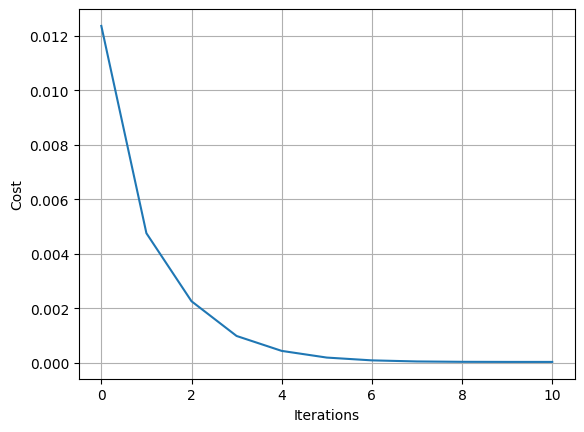

In [31]:
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [32]:
NN.forward(X)

array([[0.00364907],
       [0.01197303],
       [0.00455227]])

In [33]:

Y

array([[0.0075],
       [0.0082],
       [0.0093]])

In [34]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

# normalize
hoursSleepNorm = hoursSleep / 10
hoursStudyNorm = hoursStudy / 5

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()


In [35]:
allOutputs = NN.forward(allInputs)

Text(0, 0.5, 'Hours Study')

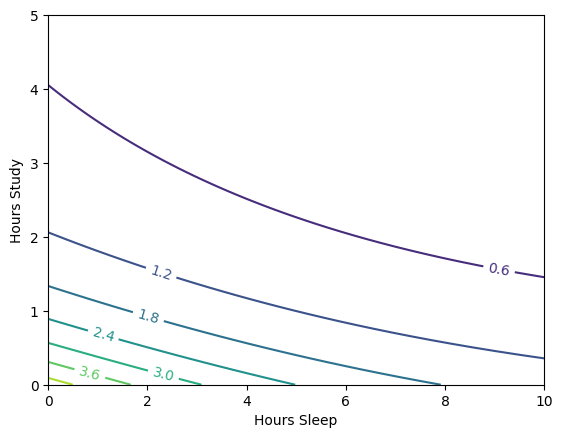

In [36]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

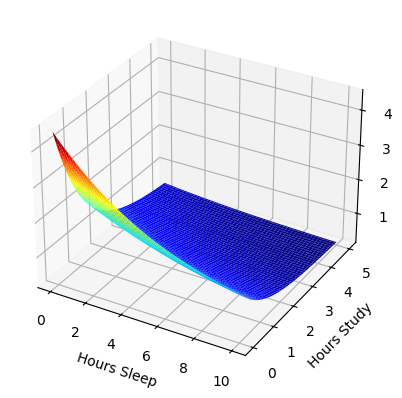

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
# Modern way to create 3D axes
ax = fig.add_subplot(111, projection='3d')

# Your plotting code
surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), cmap=plt.cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

plt.show()

# Theory: L2 Regularization (Weight Decay)

The modifications made to the `Neural_Network` class introduce **L2 Regularization**. This technique is used to combat **overfitting** by discouraging the model from learning overly complex patterns that only exist in the training data.

---

## 1. The Regularized Cost Function ($J$)
In a standard neural network, the cost function only measures the error between the prediction ($\hat{y}$) and the actual target ($y$). Regularization adds a "penalty" term based on the magnitude of the weights.

The formula implemented in the code is:
$$J = \frac{1}{2m} \sum (y - \hat{y})^2 + \frac{\lambda}{2} \sum (W^2)$$

* **The Error Term:** $\frac{1}{2m} \sum (y - \hat{y})^2$ ensures the model stays accurate by minimizing the difference between predicted and actual values.
* **The Penalty Term (L2 Norm):** $\frac{\lambda}{2} \sum (W^2)$ penalizes large weight values. It sums the squares of all weights in $W_1$ and $W_2$.
* **$\lambda$ (Lambda):** This is the **regularization strength**.
    * **High $\lambda$:** Makes the model simpler (smoother), but carries a risk of underfitting.
    * **Low $\lambda$:** Allows the model to be more complex, but carries a risk of overfitting.



---

## 2. Why "Small Weights" Help
When a model overfits, the weights often become very large as the network tries to "wiggle" its output to hit every single noisy data point in the training set. By forcing weights to remain small:
* **Smoothness:** The 3D surface plot becomes smoother rather than jagged.
* **Robustness:** The model becomes less sensitive to small fluctuations or noise in the input data.
* **Variance Reduction:** It reduces the model's variance, meaning it will perform more consistently on unseen test data.



---

## 3. Modifying the Gradient (`costFunctionPrime`)
To minimize the new Cost Function, the optimizer needs the derivative (gradient) of the *entire* expression, including the penalty.

Mathematically, the derivative of the penalty term $\frac{\lambda}{2}W^2$ with respect to $W$ is simply $\lambda W$. This is why the code adds `self.Lambda * self.W` to the backpropagation gradients

In [44]:
NN = Neural_Network()

In [39]:
X = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
y = np.array(([75], [82], [93], [70]), dtype=float)

Text(0, 0.5, 'Test Score')

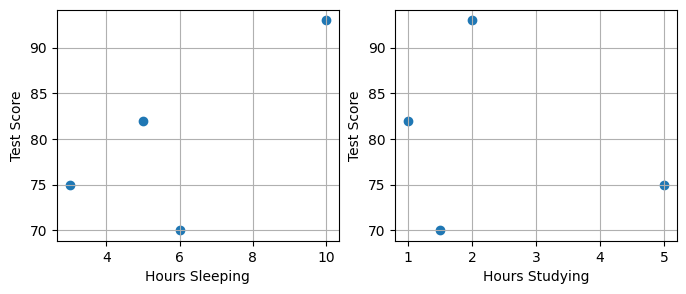

In [46]:
#Plot projections of our new data:
fig = plt.figure(0,(8,3))

plt.subplot(1,2,1)
plt.scatter(X[:,0], y)
plt.grid(1)
plt.xlabel('Hours Sleeping')
plt.ylabel('Test Score')

plt.subplot(1,2,2)
plt.scatter(X[:,1], y)
plt.grid(1)
plt.xlabel('Hours Studying')
plt.ylabel('Test Score')

In [47]:
#Normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [48]:
#Train network with new data:
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 179
         Function evaluations: 201
         Gradient evaluations: 201


Text(0, 0.5, 'Cost')

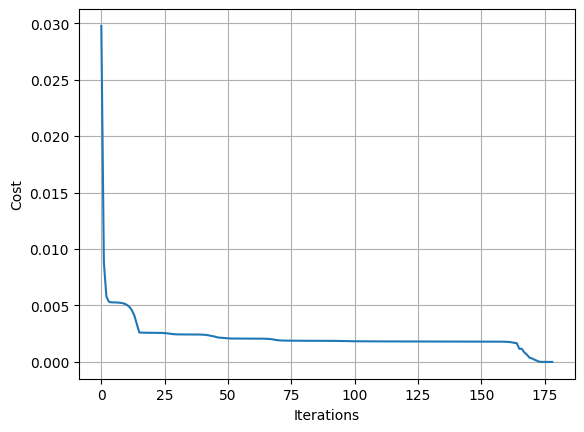

In [50]:
#Plot cost during training:
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [51]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [52]:
allOutputs = NN.forward(allInputs)

Text(0, 0.5, 'Hours Study')

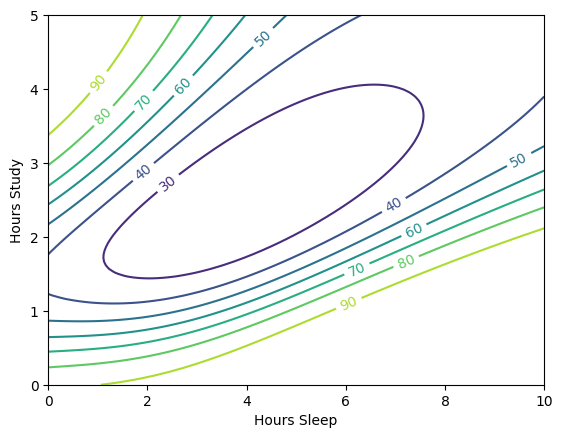

In [54]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

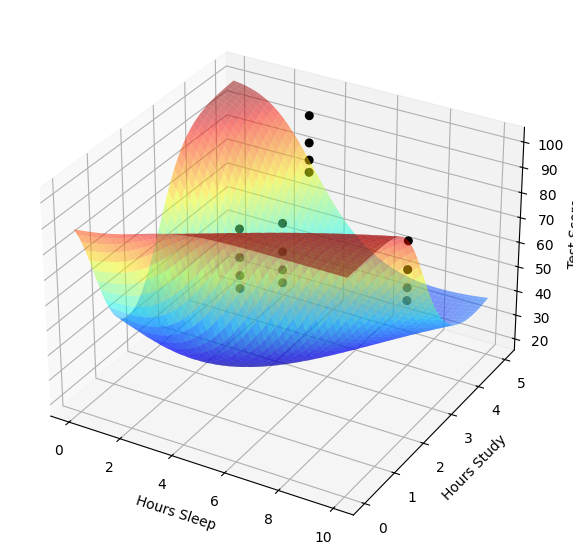

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Use this to enable interactive rotation in Jupyter/Spyder
# %matplotlib qt

fig = plt.figure(figsize=(10, 7))

# FIX: Use add_subplot instead of gca
ax = fig.add_subplot(111, projection='3d')

# Scatter training examples:
# Added label for clarity
ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha=1, s=30, label='Actual Data')

# Plot surface:
# Ensure allOutputs is reshaped correctly to match the meshgrid (xx, yy)
surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100),
                       cmap=cm.jet, alpha=0.5, antialiased=True)

# Labels
ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

plt.show()

# **Use Traning and Testing Dataset**

In [57]:

#Training Data:
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normalize:
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(trainX, axis=0)
testY = testY/100 #Max test score is 100

In [65]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N

    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)

        return cost, grad

    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY

        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []

        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [58]:
Lambda = 0.0001

In [59]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [60]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0):
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

        #Regularization Parameter:
        self.Lambda = Lambda

    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J

    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

        return dJdW1, dJdW2

    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params

    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [61]:
NN = Neural_Network(Lambda=0.0001)

In [66]:
T = trainer(NN)

In [67]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.002618
         Iterations: 98
         Function evaluations: 102
         Gradient evaluations: 102


Text(0, 0.5, 'Cost')

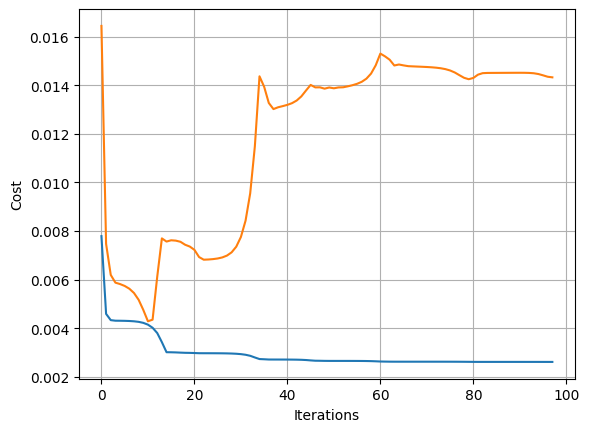

In [68]:
plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

Text(0, 0.5, 'Hours Study')

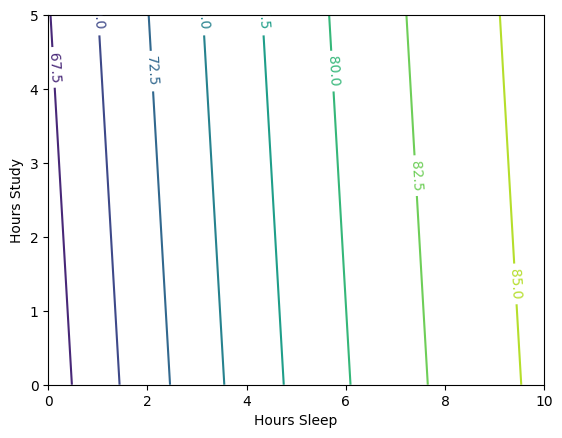

In [69]:
allOutputs = NN.forward(allInputs)

#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

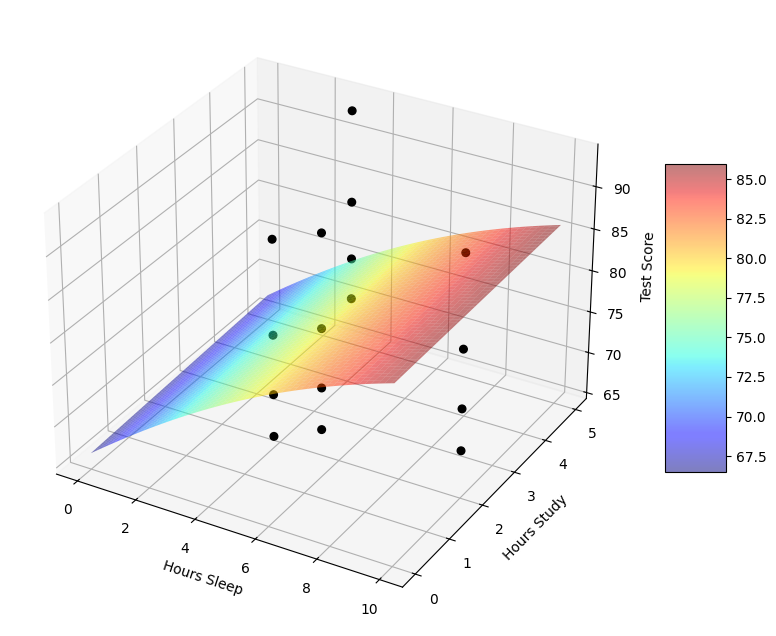

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Use %matplotlib qt if you want a separate interactive window
# %matplotlib qt

fig = plt.figure(figsize=(10, 8))

# FIX: Modern way to create 3D axes
ax = fig.add_subplot(111, projection='3d')

# Scatter training examples:
# Multiplying by scalars to scale normalized data back to real-world units
ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha=1, s=30)

# Plot surface:
# We reshape the model predictions to fit the grid defined by xx and yy
surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100),
                       cmap=cm.jet, alpha=0.5, linewidth=0, antialiased=True)

# Add a color bar to show the scale of the Test Scores
fig.colorbar(surf, shrink=0.5, aspect=5)

# Axis labels
ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

plt.show()